<a href="https://colab.research.google.com/github/Syeda-Tazneen/skills_development/blob/main/KNN_and_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('Classified Data', index_col=0)
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
dataset.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [ ]:
# Encoding is not required as all variables are float or int
# check outlier - not required
dataset.describe()
# feature scaling is also not required as all data falls between 0 and 2

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [ ]:
# check imbalance dataset
dataset['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [ ]:
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
# split the data into ind and dep vairable
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [ ]:
x.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [ ]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

# split the data into training and testing for model building and prediction

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
y_test

545    0
298    0
109    0
837    0
194    0
      ..
68     1
449    0
715    1
793    0
688    1
Name: TARGET CLASS, Length: 200, dtype: int64

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(800, 10) (200, 10) (800,) (200,)


# Building K-Nearest Neighbors Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # KNeighborsRegressor

In [ ]:
# We have to find best K-Value by using vizualization
# K is the hyperparameter value

error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred !=y_test))

In [ ]:
error_rate

[0.06,
 0.09,
 0.065,
 0.07,
 0.07,
 0.06,
 0.05,
 0.055,
 0.05,
 0.05,
 0.055,
 0.055,
 0.05,
 0.05,
 0.05,
 0.045,
 0.05,
 0.05,
 0.055,
 0.05,
 0.05,
 0.06,
 0.055,
 0.055,
 0.05,
 0.05,
 0.045,
 0.05,
 0.045]

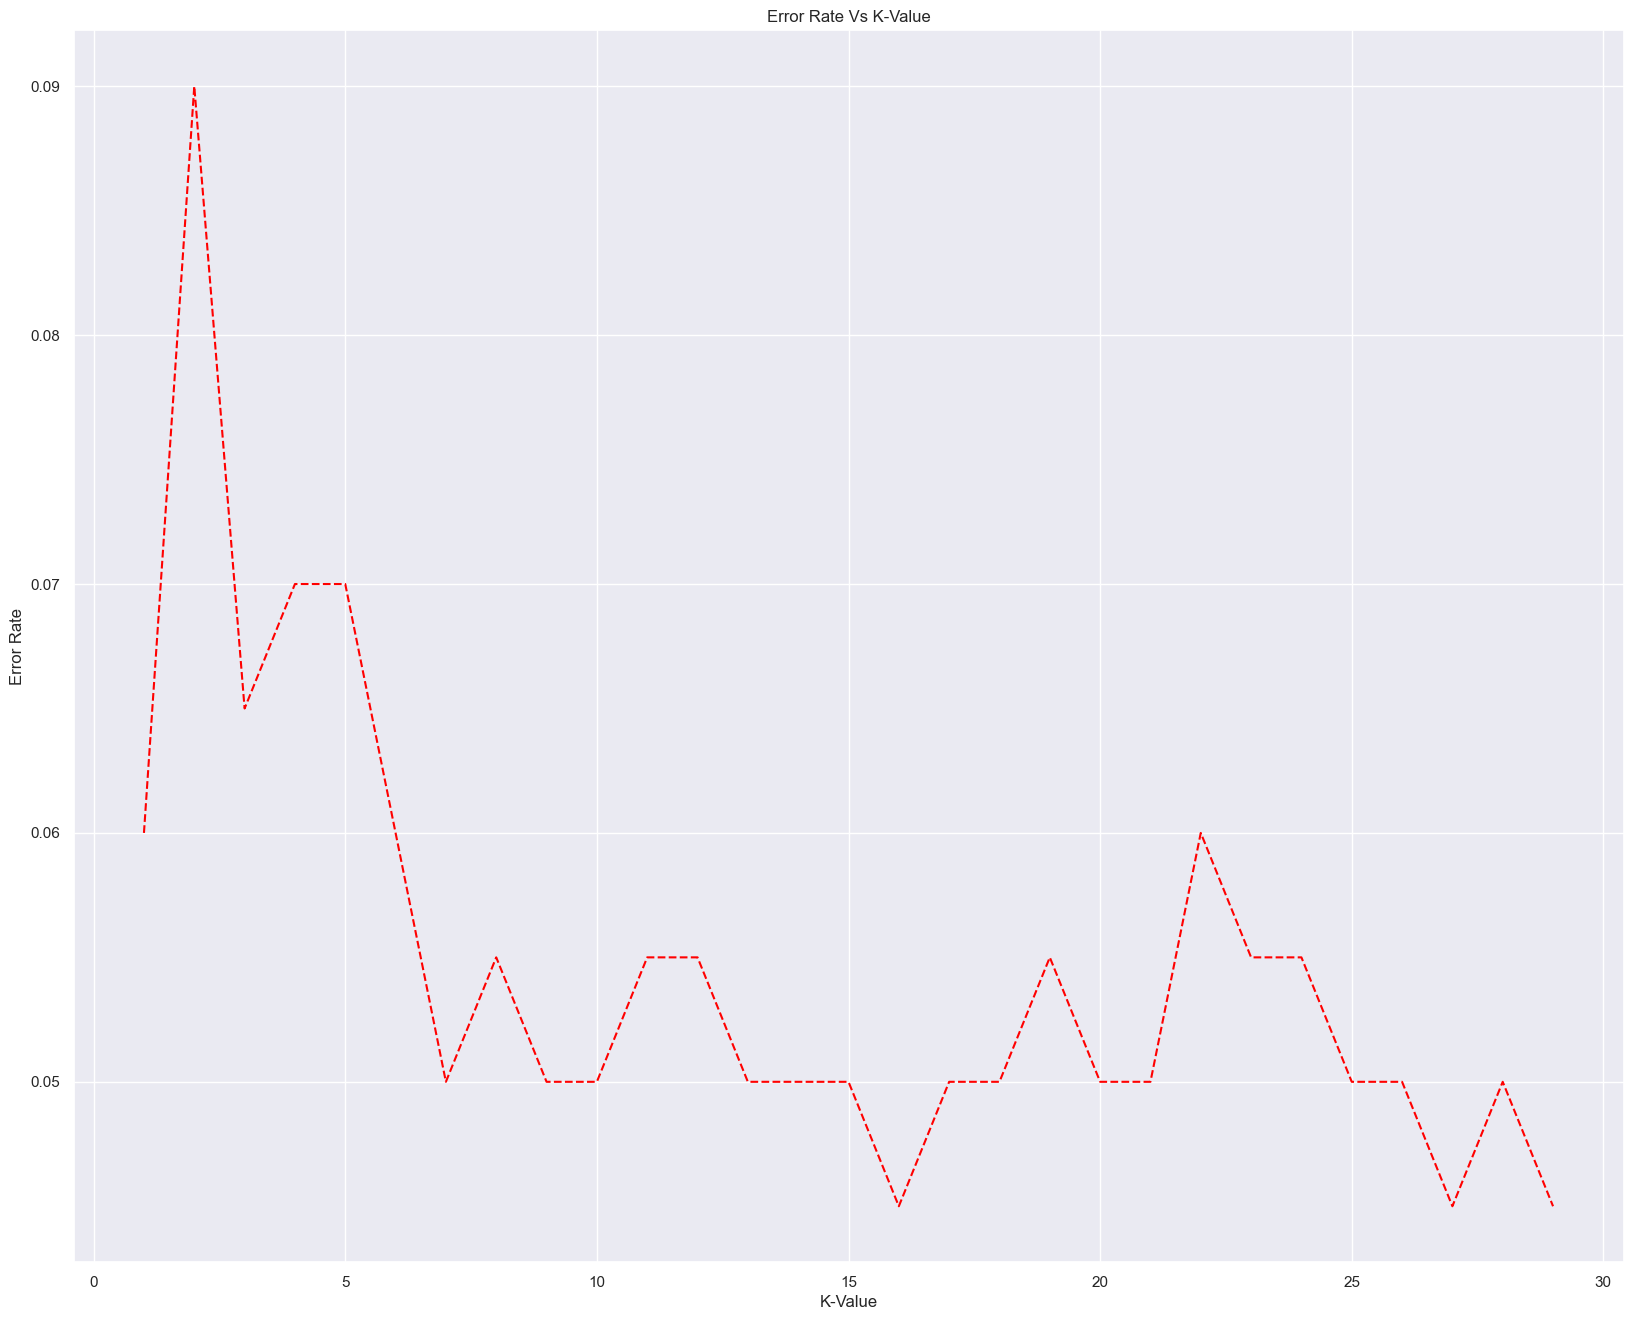

In [ ]:
plt.figure(figsize=(20,16))
plt.plot(range(1,30), error_rate, color='red', linestyle='dashed', markerfacecolor='blue')
plt.title("Error Rate Vs K-Value")
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
# Basis the above visualization, we can see k=5 is giving less error
knn = KNeighborsClassifier(n_neighbors = 27)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [ ]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       394
           1       0.92      0.97      0.94       406

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       106
           1       0.95      0.96      0.95        94

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



In [ ]:
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[361  33]
 [ 13 393]]

[[101   5]
 [  4  90]]


In [ ]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

0.9425

0.955


# Support Vector Machine

In [ ]:
# part 1 - Kernel = 'linear'

from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_train_linear = svm_linear.predict(x_train)
y_pred_test_linear = svm_linear.predict(x_test)

In [ ]:
print(accuracy_score(y_train, y_pred_train_linear))
print()
print(accuracy_score(y_test, y_pred_test_linear))

0.95

0.955


In [ ]:
# part 2 - Kernel = 'sigmoid'

from sklearn.svm import SVC

svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [ ]:
y_pred_train_sigmoid = svm_sigmoid.predict(x_train)
y_pred_test_sigmoid = svm_sigmoid.predict(x_test)

In [ ]:
print(accuracy_score(y_train, y_pred_train_sigmoid))
print()
print(accuracy_score(y_test, y_pred_test_sigmoid))

0.5075

0.47


In [ ]:
# part 3 - Kernel = 'poly'

from sklearn.svm import SVC

svm_poly = SVC(kernel='poly')
svm_poly.fit(x_train, y_train)

SVC(kernel='poly')

In [ ]:
y_pred_train_poly = svm_poly.predict(x_train)
y_pred_test_poly = svm_poly.predict(x_test)

In [ ]:
print(accuracy_score(y_train, y_pred_train_poly))
print()
print(accuracy_score(y_test, y_pred_test_poly))

0.965

0.93


In [ ]:
# part 4 - Kernel = 'rbf'

from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train)

SVC()

In [ ]:
y_pred_train_rbf = svm_rbf.predict(x_train)
y_pred_test_rbf = svm_rbf.predict(x_test)

In [ ]:
print(accuracy_score(y_train, y_pred_train_rbf))
print()
print(accuracy_score(y_test, y_pred_test_rbf))

0.96375

0.96


In [ ]:
# I prefer to go with kernel = 'rbf' as it gave best train and test accuracy